<a href="https://colab.research.google.com/github/ADRIANVM117/proyectos_propios/blob/main/Estadistica/analisis_exploratorio/multiples_regresiones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multimples regresiones

# Regresión 

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

import h5py

brfss= pd.read_hdf('/content/brfss.hdf5', 'brfss')
gss = pd.read_hdf('/content/gss.hdf5', 'gss')

In [4]:
from scipy.stats import linregress
import statsmodels.formula.api as smf

# Run regression with linregress
subset = brfss.dropna(subset=['INCOME2', '_VEGESU1'])
xs = subset['INCOME2']
ys = subset['_VEGESU1']
res = linregress(xs, ys)
print(res)

# Run regression with StatsModels
results = smf.ols('INCOME2 ~ _VEGESU1', data = subset).fit()
print(results.params)

LinregressResult(slope=0.06988048092105019, intercept=1.5287786243363106, rvalue=0.11967005884864107, pvalue=1.378503916247615e-238, stderr=0.002110976356332332)
Intercept    5.450700
_VEGESU1     0.204935
dtype: float64


<b> EJERCICIO </b>

 - graficar la relación entre el ingreso y la educación 
    - agrupar por la variable 'educ' el dataframe 

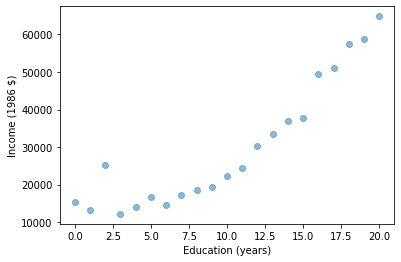

In [10]:
# Group by educ
grouped = gss.groupby('educ')



# Compute mean income in each group
mean_income_by_educ = grouped['realinc'].mean()

# Plot mean income as a scatter plot
plt.plot(mean_income_by_educ, 'o', alpha = .5)

# Label the axes
plt.xlabel('Education (years)')
plt.ylabel('Income (1986 $)')
plt.show()

- Parece ser que la relación entre la educación y los ingresos no es lineal 

In [9]:
gss['educ'].value_counts(ascending = False)

12.0    19145
16.0     7953
14.0     6980
13.0     5405
11.0     3864
15.0     2836
10.0     2819
8.0      2421
18.0     2109
9.0      1963
17.0     1791
20.0     1294
7.0       860
6.0       842
19.0      774
5.0       379
4.0       290
3.0       246
2.0       151
0.0       144
1.0        38
Name: educ, dtype: int64

In [8]:
!pip install empiricaldist 

from empiricaldist import Pmf

pmf_edad = Pmf.from_seq(gss['educ'].dropna(), normalize= False) 
print(pmf_edad)

  Created wheel for empiricaldist: filename=empiricaldist-0.6.3-py3-none-any.whl size=10545 sha256=57706493d505f1993738f82b7e5e28d51a782493120cf27d8ae395ee2547b41f
  Stored in directory: /root/.cache/pip/wheels/be/4d/30/c131cf1cbb0046f14436cdd7a29f4cc8553d34754e3685d071
Successfully built empiricaldist
0.0       144
1.0        38
2.0       151
3.0       246
4.0       290
5.0       379
6.0       842
7.0       860
8.0      2421
9.0      1963
10.0     2819
11.0     3864
12.0    19145
13.0     5405
14.0     6980
15.0     2836
16.0     7953
17.0     1791
18.0     2109
19.0      774
20.0     1294
Name: , dtype: int64


## Modelo no lineal 

In [12]:
import statsmodels.formula.api as smf

# Add a new column with educ squared
gss['educ2'] = gss['educ'] ** 2 
gss['age2'] = gss['age'] ** 2

# Run a regression model with educ, educ2, age, and age2
results = smf.ols('realinc ~ educ + educ2 + age + age2', data = gss).fit()

# Print the estimated parameters
print(results.params)

Intercept   -23241.884034
educ          -528.309369
educ2          159.966740
age           1696.717149
age2           -17.196984
dtype: float64


- La pendiente de educ2 es positiva y tiene con una curva hacia arriba 

Graficar una regresión multiple es complicado, para ello es mejor graficar las predicciones 

In [13]:
# Run a regression model with educ, educ2, age, and age2
results = smf.ols('realinc ~ educ + educ2 + age + age2', data=gss).fit()

# Make the DataFrame
df = pd.DataFrame()
df['educ'] = np.linspace(0,20)
df['age'] = 30
df['educ2'] = df['educ']**2
df['age2'] = df['age']**2

# Generate and plot the predictions
pred = results.predict(df)
print(pred.head())

0    12182.344976
1    11993.358518
2    11857.672098
3    11775.285717
4    11746.199374
dtype: float64


<Figure size 432x288 with 0 Axes>

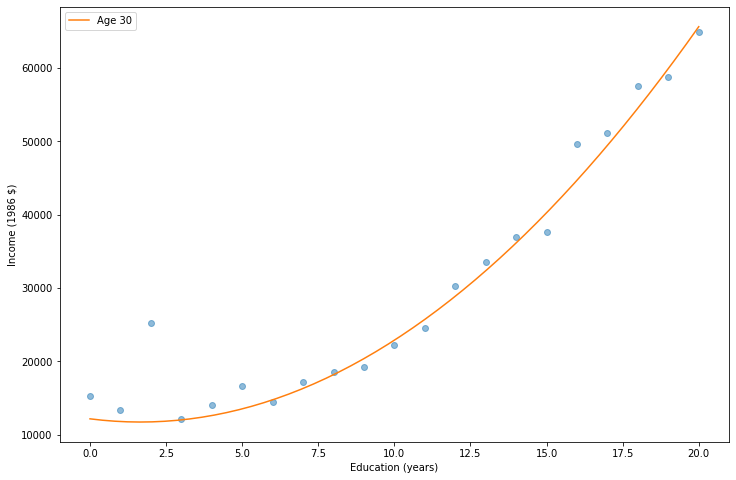

In [16]:
# Plot mean income in each age group
plt.clf()
grouped = gss.groupby('educ')
mean_income_by_educ = grouped['realinc'].mean()
plt.figure(figsize = (12,8))
plt.plot(mean_income_by_educ, 'o', alpha = .5)

# Plot the predictions
pred = results.predict(df)
plt.plot(df['educ'], pred, label='Age 30')

# Label axes
plt.xlabel('Education (years)')
plt.ylabel('Income (1986 $)')
plt.legend()
plt.show()

- El modelo se ajusta a la regresión 

## Regresión logistica 

Información : https://www.cienciadedatos.net/documentos/27_regresion_logistica_simple_y_multiple

<b> EJERCICIO </b>

- Predecir la variable binaria 

  - utilizan la edad, el sexo y el nivel de educación para predecir el apoyo a la legalización del cannabis (marihuana) en EE.UU.

  -  la variable 'grass' registra la respuesta a la pregunta "¿Cree que el consumo de marihuana debería ser legal o no?"

In [23]:
# Recode grass
gss['grass'].replace(2, 0, inplace=True)

# Run logistic regression
results = smf.logit('grass ~ age + age2+ educ + educ2 +  C(sex)', data = gss).fit()
results.params

Optimization terminated successfully.
         Current function value: 0.588510
         Iterations 6


Intercept     -1.685223
C(sex)[T.2]   -0.384611
age           -0.034756
age2           0.000192
educ           0.221860
educ2         -0.004163
dtype: float64

In [25]:
# Make a DataFrame with a range of ages
df = pd.DataFrame()
df['age'] = np.linspace(18, 89)
df['age2'] = df['age']**2

# Set the education level to 12
df['educ'] = 12
df['educ2'] = df['educ'] ** 2


# Generate predictions for men and women
df['sex'] = 1
pred1 = results.predict(df)

df['sex'] = 2
pred2 = results.predict(df)

<Figure size 432x288 with 0 Axes>

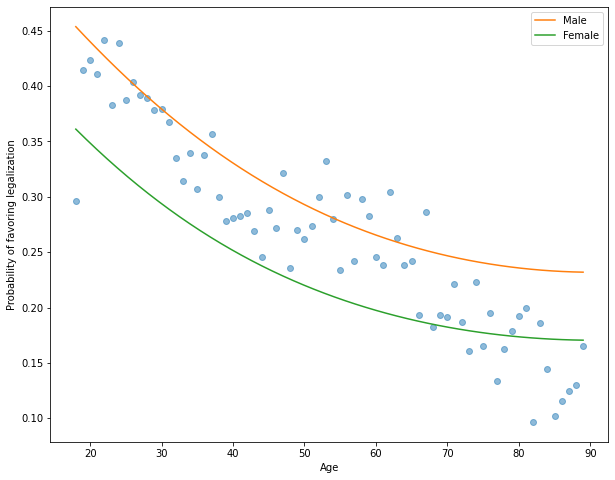

In [27]:
plt.clf()
grouped = gss.groupby('age')
favor_by_age = grouped['grass'].mean()
plt.figure(figsize = (10,8))
plt.plot(favor_by_age, 'o', alpha=0.5)

plt.plot(df['age'], pred1, label='Male')
plt.plot(df['age'], pred2, label = 'Female')

plt.xlabel('Age')
plt.ylabel('Probability of favoring legalization')
plt.legend()
plt.show()